In [1]:
# Restaurant Simulation Testing & Configuration Notebook
# This notebook demonstrates how to use the updated restaurant simulation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, List
import json

# Import simulation components
from parameters import SingleDishParameters
from simulation import SingleDishRestaurantSim
from results import calculate_results, format_results, print_results
from dish_loading import load_recipes_from_json  # Add this line
import dish_recipes

In [2]:
# ============================================================================
# BASIC USAGE: Run Simulation with Comal Recipes
# ============================================================================

def run_comal_simulation(duration_minutes=240, verbose=True, use_comal_recipes=True):
    """Run simulation with Comal restaurant recipes from JSON file.
    
    Args:
        duration_minutes: Simulation duration in minutes
        verbose: If True, print formatted results
        use_comal_recipes: If True, load recipes from comal_recipes.json
                          If False, use default parameters
    """
    
    # Load recipes and menu catalog from JSON file, or use defaults
    if use_comal_recipes:
        print("Loading Comal recipes from comal_recipes.json...")
        params = load_recipes_from_json('comal_recipes.json')
        print(f"✓ Loaded {len(params.dish_recipes)} dishes with prices")
        print(f"✓ Menu distribution: {len(params.menu_distribution)} items")
        if params.menu_catalog:
            print(f"✓ Menu catalog: {len(params.menu_catalog)} items with prices")
    else:
        print("Using default parameters...")
        params = SingleDishParameters()
    
    params.simulation_duration = duration_minutes
    params.enable_logging = True  # Set to True to see snapshots
    
    # Create and run simulation
    sim = SingleDishRestaurantSim(params)
    results = sim.run()
    
    # Add config for formatting
    results['num_tables'] = params.num_tables
    results['num_servers'] = params.num_servers
    results['num_cooks'] = params.num_cooks
    results['simulation_duration'] = params.simulation_duration
    
    if verbose:
        print_results(results)
    
    return sim, results

# Run a simulation with Comal recipes
print("=" * 70)
print("COMAL RESTAURANT SIMULATION (4 hours)")
print("=" * 70)
sim, results = run_comal_simulation(duration_minutes=240, verbose=True, use_comal_recipes=True)

COMAL RESTAURANT SIMULATION (4 hours)
Loading Comal recipes from comal_recipes.json...
✓ Loaded 92 dishes with prices
✓ Menu distribution: 92 items
✓ Menu catalog: 92 items with prices
RESTAURANT SIMULATION RESULTS

🎯 PRIMARY KPI: NET REVPASH
----------------------------------------------------------------------
  Net RevPASH: $2.64 per seat-hour
  (Revenue - Labor Cost) / Seat Hours
  Gross RevPASH: $6.14 per seat-hour

📊 CONFIGURATION
----------------------------------------------------------------------
  Tables: 41 (Total Seats: 136)
  Servers: 6, Cooks: 9
  Simulation Duration: 4.0 hours

👥 THROUGHPUT & SERVICE RATE
----------------------------------------------------------------------
  Parties Arrived: 88
  Parties Served: 57 (64.8%)
  Parties with Table: 88
  Parties Abandoned: 31
  Parties Waiting for Table: 0

👥 GUEST COUNT & PARTY SIZE
----------------------------------------------------------------------
  Total Guests Arrived: 232
  Total Guests Served: 142
  Avg Party Siz

TABLE UTILIZATION ANALYSIS

📊 TABLE CONFIGURATION
----------------------------------------------------------------------
Total Tables: 41
Total Seats: 136

Table Size Distribution:
  2-seat tables: 23
  4-seat tables: 11
  6-seat tables: 6
  10-seat tables: 1

Zones: 6
  Zone 0: 7 tables, 22 seats
  Zone 1: 7 tables, 22 seats
  Zone 2: 7 tables, 22 seats
  Zone 3: 7 tables, 22 seats
  Zone 4: 7 tables, 22 seats
  Zone 5: 6 tables, 26 seats

📋 TABLE ASSIGNMENT ANALYSIS
----------------------------------------------------------------------
Total Table Assignments: 88
Unique Tables Used: 40
Tables Never Used: 1

Average Seat Waste: 0.68 seats per assignment
Total Seat Waste: 60 seat-assignments
Perfect Matches (no waste): 44/88 (50.0%)

Large Waste Cases (≥3 seats): 4
    party_size  table_size  waste  zone_id
13           3           6      3        1
28           3          10      7        5
31           7          10      3        5
69           3           6      3        3

🗺️  ZONE

/var/folders/nr/nkywtxqj4vq5n8czt847c2lc0000gp/T/ipykernel_98727/2458080693.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_df['duration'] = zone_df['released_time'] - zone_df['assigned_time']
/var/folders/nr/nkywtxqj4vq5n8czt847c2lc0000gp/T/ipykernel_98727/2458080693.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_df['duration'] = zone_df['released_time'] - zone_df['assigned_time']
/var/folders/nr/nkywtxqj4vq5n8czt847c2lc0000gp/T/ipykernel_98727/2458080693.py:108: SettingWithCopyWarni

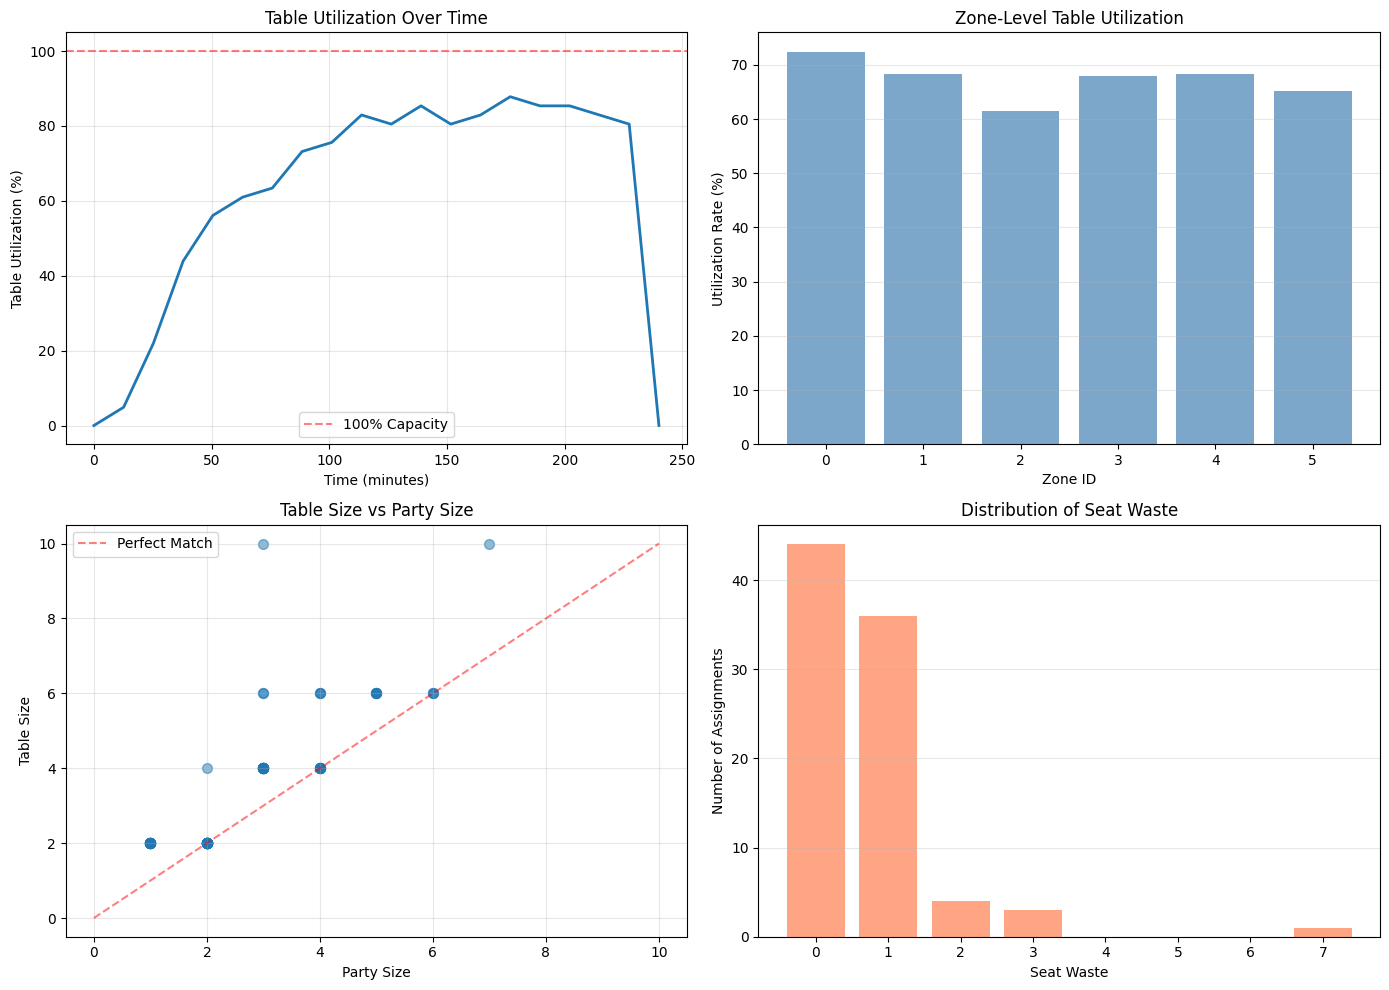


SUMMARY
Total Tables: 41
Tables Used: 40
Tables Unused: 1
Overall Utilization: 61.7%
Average Seat Waste: 0.68 seats
Perfect Matches: 44/88 (50.0%)

⚠️  POTENTIAL ISSUES:
  ✓ No major issues detected


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from simulation import RestaurantSimulation
from dish_loading import load_recipes_from_json

# Load and run simulation
params = load_recipes_from_json('comal_recipes.json')
params.simulation_duration = 240.0  # 4 hours

sim = RestaurantSimulation(params)
results = sim.run()

# ============================================================================
# TABLE UTILIZATION ANALYSIS
# ============================================================================

print("=" * 70)
print("TABLE UTILIZATION ANALYSIS")
print("=" * 70)

# 1. Table Configuration
print("\n📊 TABLE CONFIGURATION")
print("-" * 70)
total_tables = len(sim.table_sizes)
total_seats = sum(sim.table_sizes)
print(f"Total Tables: {total_tables}")
print(f"Total Seats: {total_seats}")

# Table size distribution
table_size_dist = {}
for size in sim.table_sizes:
    table_size_dist[size] = table_size_dist.get(size, 0) + 1
print(f"\nTable Size Distribution:")
for size in sorted(table_size_dist.keys()):
    print(f"  {size}-seat tables: {table_size_dist[size]}")

# Zone distribution
print(f"\nZones: {max(1, params.num_servers)}")
for zone_id in sorted(sim.zone_to_tables.keys()):
    zone_tables = sim.zone_to_tables[zone_id]
    zone_seats = sum(sim.table_id_to_size[tid] for tid in zone_tables)
    print(f"  Zone {zone_id}: {len(zone_tables)} tables, {zone_seats} seats")

# 2. Table Assignment Analysis
print("\n📋 TABLE ASSIGNMENT ANALYSIS")
print("-" * 70)

# Track all table assignments
table_assignments = []  # (table_id, party_id, party_size, zone_id, assigned_time, released_time)
for party in sim.parties:
    if party.tables_assigned:
        for table_id in party.tables_assigned:
            table_assignments.append({
                'table_id': table_id,
                'party_id': party.id,
                'party_size': party.party_size,
                'table_size': sim.table_id_to_size[table_id],
                'zone_id': party.zone_id,
                'assigned_time': party.table_assigned_time,
                'released_time': party.departure_time if party.departure_time else params.simulation_duration,
                'waste': sim.table_id_to_size[table_id] - party.party_size,
                'served': party.departure_time is not None
            })

df_assignments = pd.DataFrame(table_assignments)

if len(df_assignments) > 0:
    # Table utilization metrics
    print(f"Total Table Assignments: {len(df_assignments)}")
    print(f"Unique Tables Used: {df_assignments['table_id'].nunique()}")
    print(f"Tables Never Used: {total_tables - df_assignments['table_id'].nunique()}")
    
    # Average waste (seats unused)
    avg_waste = df_assignments['waste'].mean()
    print(f"\nAverage Seat Waste: {avg_waste:.2f} seats per assignment")
    print(f"Total Seat Waste: {df_assignments['waste'].sum():.0f} seat-assignments")
    
    # Perfect matches (no waste)
    perfect_matches = (df_assignments['waste'] == 0).sum()
    print(f"Perfect Matches (no waste): {perfect_matches}/{len(df_assignments)} ({100*perfect_matches/len(df_assignments):.1f}%)")
    
    # Large waste cases
    large_waste = df_assignments[df_assignments['waste'] >= 3]
    if len(large_waste) > 0:
        print(f"\nLarge Waste Cases (≥3 seats): {len(large_waste)}")
        print(large_waste[['party_size', 'table_size', 'waste', 'zone_id']].head(10))
    
    # 3. Zone-Level Analysis
    print("\n🗺️  ZONE-LEVEL UTILIZATION")
    print("-" * 70)
    
    zone_stats = []
    for zone_id in sorted(sim.zone_to_tables.keys()):
        zone_tables = sim.zone_to_tables[zone_id]
        zone_df = df_assignments[df_assignments['zone_id'] == zone_id]
        
        # Tables in this zone
        tables_in_zone = len(zone_tables)
        tables_used = zone_df['table_id'].nunique() if len(zone_df) > 0 else 0
        tables_unused = tables_in_zone - tables_used
        
        # Assignments in this zone
        assignments = len(zone_df)
        
        # Total time tables were occupied
        if len(zone_df) > 0:
            zone_df['duration'] = zone_df['released_time'] - zone_df['assigned_time']
            total_occupied_time = zone_df['duration'].sum()
            avg_occupancy_time = zone_df['duration'].mean()
        else:
            total_occupied_time = 0
            avg_occupancy_time = 0
        
        # Utilization rate (table-hours occupied / table-hours available)
        total_table_hours = tables_in_zone * (params.simulation_duration / 60.0)
        occupied_table_hours = total_occupied_time / 60.0
        utilization_rate = (occupied_table_hours / total_table_hours * 100) if total_table_hours > 0 else 0
        
        zone_stats.append({
            'zone_id': zone_id,
            'tables_total': tables_in_zone,
            'tables_used': tables_used,
            'tables_unused': tables_unused,
            'assignments': assignments,
            'avg_occupancy_time': avg_occupancy_time,
            'utilization_rate': utilization_rate
        })
        
        print(f"Zone {zone_id}:")
        print(f"  Tables: {tables_used}/{tables_in_zone} used ({tables_unused} unused)")
        print(f"  Assignments: {assignments}")
        print(f"  Avg Occupancy Time: {avg_occupancy_time:.2f} min")
        print(f"  Utilization Rate: {utilization_rate:.1f}%")
    
    df_zone_stats = pd.DataFrame(zone_stats)
    
    # 4. Time-Based Utilization
    print("\n⏱️  TIME-BASED TABLE UTILIZATION")
    print("-" * 70)
    
    # Sample utilization at different time points
    time_samples = np.linspace(0, params.simulation_duration, 20)
    utilization_over_time = []
    
    for t in time_samples:
        # Count tables occupied at time t
        occupied = df_assignments[
            (df_assignments['assigned_time'] <= t) & 
            (df_assignments['released_time'] > t)
        ]
        num_occupied = len(occupied)
        utilization_pct = (num_occupied / total_tables * 100) if total_tables > 0 else 0
        utilization_over_time.append({
            'time': t,
            'occupied': num_occupied,
            'available': total_tables - num_occupied,
            'utilization_pct': utilization_pct
        })
    
    df_util = pd.DataFrame(utilization_over_time)
    print(f"Average Utilization: {df_util['utilization_pct'].mean():.1f}%")
    print(f"Max Utilization: {df_util['utilization_pct'].max():.1f}%")
    print(f"Min Utilization: {df_util['utilization_pct'].min():.1f}%")
    
    # 5. Party Waiting Analysis
    print("\n👥 PARTY WAITING FOR TABLES")
    print("-" * 70)
    
    parties_with_table = [p for p in sim.parties if p.table_assigned_time is not None]
    parties_never_got_table = [p for p in sim.parties if p.table_assigned_time is None]
    
    print(f"Parties that got table: {len(parties_with_table)}")
    print(f"Parties that never got table: {len(parties_never_got_table)}")
    
    if len(parties_with_table) > 0:
        wait_times = [p.table_assigned_time - p.arrival_time for p in parties_with_table]
        print(f"Avg Wait Time: {np.mean(wait_times):.2f} min")
        print(f"Max Wait Time: {np.max(wait_times):.2f} min")
    
    # Parties waiting by zone preference
    if len(parties_never_got_table) > 0:
        print(f"\nParties still waiting at end:")
        for p in parties_never_got_table[:10]:
            print(f"  Party {p.id} (size {p.party_size}) arrived at {p.arrival_time:.1f} min")
    
    # 6. Visualization
    print("\n📈 GENERATING VISUALIZATIONS...")
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Utilization over time
    ax1 = axes[0, 0]
    ax1.plot(df_util['time'], df_util['utilization_pct'], linewidth=2)
    ax1.axhline(y=100, color='r', linestyle='--', alpha=0.5, label='100% Capacity')
    ax1.set_xlabel('Time (minutes)')
    ax1.set_ylabel('Table Utilization (%)')
    ax1.set_title('Table Utilization Over Time')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Zone utilization
    ax2 = axes[0, 1]
    zones = df_zone_stats['zone_id']
    util_rates = df_zone_stats['utilization_rate']
    ax2.bar(zones, util_rates, color='steelblue', alpha=0.7)
    ax2.set_xlabel('Zone ID')
    ax2.set_ylabel('Utilization Rate (%)')
    ax2.set_title('Zone-Level Table Utilization')
    ax2.set_xticks(zones)
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Plot 3: Table size vs party size
    ax3 = axes[1, 0]
    if len(df_assignments) > 0:
        ax3.scatter(df_assignments['party_size'], df_assignments['table_size'], 
                   alpha=0.5, s=50)
        # Perfect match line
        max_size = max(df_assignments['party_size'].max(), df_assignments['table_size'].max())
        ax3.plot([0, max_size], [0, max_size], 'r--', alpha=0.5, label='Perfect Match')
        ax3.set_xlabel('Party Size')
        ax3.set_ylabel('Table Size')
        ax3.set_title('Table Size vs Party Size')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
    
    # Plot 4: Seat waste distribution
    ax4 = axes[1, 1]
    if len(df_assignments) > 0:
        waste_counts = df_assignments['waste'].value_counts().sort_index()
        ax4.bar(waste_counts.index, waste_counts.values, color='coral', alpha=0.7)
        ax4.set_xlabel('Seat Waste')
        ax4.set_ylabel('Number of Assignments')
        ax4.set_title('Distribution of Seat Waste')
        ax4.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # 7. Summary Statistics
    print("\n" + "=" * 70)
    print("SUMMARY")
    print("=" * 70)
    print(f"Total Tables: {total_tables}")
    print(f"Tables Used: {df_assignments['table_id'].nunique()}")
    print(f"Tables Unused: {total_tables - df_assignments['table_id'].nunique()}")
    print(f"Overall Utilization: {df_util['utilization_pct'].mean():.1f}%")
    print(f"Average Seat Waste: {avg_waste:.2f} seats")
    print(f"Perfect Matches: {perfect_matches}/{len(df_assignments)} ({100*perfect_matches/len(df_assignments):.1f}%)")
    
    # Check for issues
    print("\n⚠️  POTENTIAL ISSUES:")
    issues = []
    if df_util['utilization_pct'].max() < 80:
        issues.append("Low peak utilization - may have unused capacity")
    if df_zone_stats['utilization_rate'].std() > 20:
        issues.append("High zone imbalance - some zones underutilized")
    if len(parties_never_got_table) > 0 and df_util['utilization_pct'].max() < 100:
        issues.append("Parties waiting despite available tables - zone assignment issue")
    if avg_waste > 2:
        issues.append("High seat waste - table matching could be improved")
    
    if issues:
        for issue in issues:
            print(f"  • {issue}")
    else:
        print("  ✓ No major issues detected")
        
else:
    print("No table assignments found in simulation.")